In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dask import dataframe as dd
from datetime import datetime
import seaborn as sns

In [2]:
comments = pd.read_csv('../data/out/comments.csv', header = None)
users_comments = pd.read_csv('../data/out/users_comments.csv', header = None)

In [3]:
comments.columns = ['cid','subreddit', 'created_utc', 'karma']
users_comments.columns = ['author', 'cid']

In [4]:
# join comments and users_comments tables
cuc = pd.merge(comments, users_comments, on='cid')

### Count of Karma by Author/User

In [5]:
karma_by_author = pd.DataFrame(cuc.groupby('author')['karma'].sum()).reset_index()

In [6]:
karma_by_author = karma_by_author.sort_values('karma')
karma_by_author

,author,karma
24069,FastOCR18,-3187
133478,ginmhilleadh,-2713
172651,mikepunk,-1369
64772,SlowOCR_13,-980
159561,krakow057,-827
...,...,...
86469,ani625,16368
133025,ggggbabybabybaby,18172
55898,ProbablyHittingOnYou,18444
86101,andrewsmith1986,29956


In [7]:
top_5_sum_author = karma_by_author.sort_values(by = 'karma', ascending = False).head()
bottom_5_sum_author = karma_by_author.sort_values(by = 'karma').head()

In [8]:
top_5_sum_author.set_index('author')

,karma
author,
Sure_Ill_Draw_That,65288
andrewsmith1986,29956
ProbablyHittingOnYou,18444
ggggbabybabybaby,18172
ani625,16368


In [9]:
bottom_5_sum_author.set_index('author')

,karma
author,
FastOCR18,-3187
ginmhilleadh,-2713
mikepunk,-1369
SlowOCR_13,-980
krakow057,-827


In [10]:
# karma_by_author = pd.DataFrame(karma_by_author).reset_index()
karma_by_author['bin'] = pd.qcut(karma_by_author['karma'], q = 50, duplicates = 'drop')
karma_by_author

,author,karma,bin
24069,FastOCR18,-3187,"(-3187.001, -1.0]"
133478,ginmhilleadh,-2713,"(-3187.001, -1.0]"
172651,mikepunk,-1369,"(-3187.001, -1.0]"
64772,SlowOCR_13,-980,"(-3187.001, -1.0]"
159561,krakow057,-827,"(-3187.001, -1.0]"
...,...,...,...
86469,ani625,16368,"(714.0, 65288.0]"
133025,ggggbabybabybaby,18172,"(714.0, 65288.0]"
55898,ProbablyHittingOnYou,18444,"(714.0, 65288.0]"
86101,andrewsmith1986,29956,"(714.0, 65288.0]"


<AxesSubplot:xlabel='karma bins', ylabel='count of users in bin'>

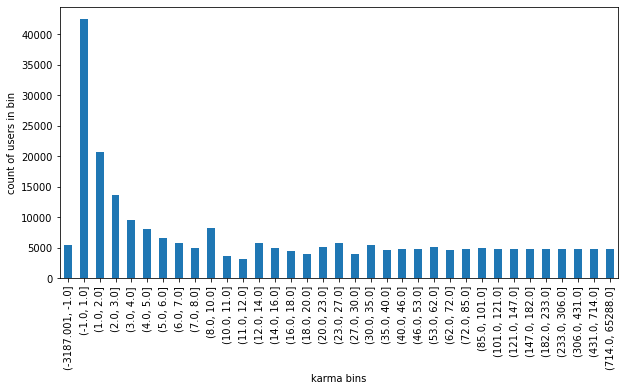

In [31]:
bins = karma_by_author.groupby('bin')['karma'].count()
#  title = 'Count of Users by Karma (Binned)',
bins.plot(kind = 'bar', xlabel = 'karma bins', ylabel = 'count of users in bin', figsize = (10, 5))

### Average Karma for Comments made by Authors/Users

In [12]:
karma_by_author_avg = pd.DataFrame(cuc.groupby('author')['karma'].mean()).reset_index()

In [13]:
top_5_avg_author = karma_by_author_avg.sort_values(by = 'karma', ascending = False).head()
bottom_5_avg_author = karma_by_author_avg.sort_values(by = 'karma').head()

In [14]:
top_5_avg_author.set_index('author')

,karma
author,
barehandhunter,2232.0
amativus,1738.0
The_Joke_Explained,1596.0
-captain-hindsight-,1293.0
Lovesnoveltyaccounts,1284.0


In [15]:
bottom_5_avg_author.set_index('author')

,karma
author,
breeedeeer,-113.0
asdffsd,-78.0
wikimedia,-65.0
AttackingHobo,-51.6
beast_of_a_priest,-47.0


<AxesSubplot:xlabel='average karma', ylabel='count of users in bin'>

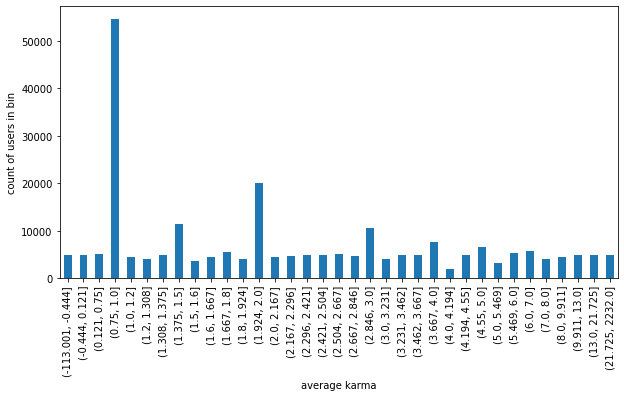

In [30]:
karma_by_author_avg['bin'] = pd.qcut(karma_by_author_avg['karma'], q = 50, duplicates = 'drop')
avg_author_bins = karma_by_author_avg.groupby('bin')['karma'].count()
# title = 'Average Karma for Comments Made by Users (Binned)',
avg_author_bins.plot(kind = 'bar', xlabel = 'average karma', ylabel = 'count of users in bin', figsize = (10, 5))

### Average Karma For a Comment by Subreddit

In [17]:
karma_by_subreddit = pd.DataFrame(cuc.groupby('subreddit')['karma'].mean()).reset_index()

In [18]:
top_5_avg_subreddit = karma_by_subreddit.sort_values(by = 'karma', ascending = False).head()
bottom_5_avg_subreddit = karma_by_subreddit.sort_values(by = 'karma').head()

In [19]:
top_5_avg_subreddit.set_index('subreddit')

,karma
subreddit,
DateRape,27.606780
republicans,23.000000
ectalProlapse,14.000000
VOTE4DICKOFTHEYEAR,12.104167
redditzine,12.000000


In [20]:
bottom_5_avg_subreddit.set_index('subreddit')

,karma
subreddit,
CompulsiveDownvoters,-5.000000
crybaby,-4.166667
coke,-2.000000
NaziHunting,-1.086957
PornStars,-1.000000


<AxesSubplot:xlabel='average karma', ylabel='count of subreddits in bin'>

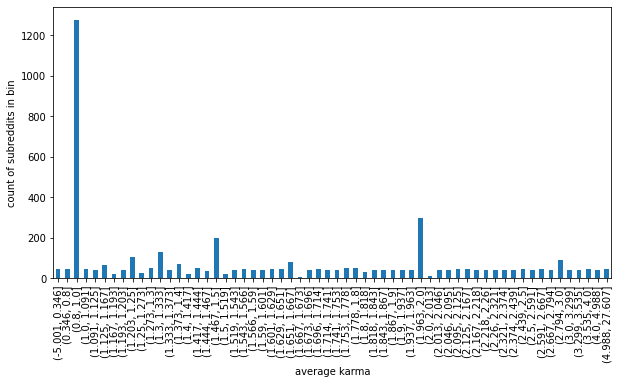

In [29]:
karma_by_subreddit['bin'] = pd.qcut(karma_by_subreddit['karma'], q = 100, duplicates = 'drop')
subreddit_bins = karma_by_subreddit.groupby('bin')['karma'].count()
#  title = 'Average Karma for a Comment by Subreddit (Binned)'
subreddit_bins.plot(kind = 'bar', xlabel = 'average karma', ylabel = 'count of subreddits in bin', figsize = (10, 5))

### Felicia Plot

In [22]:
comments

,cid,subreddit,created_utc,karma
0,c17frnf,Music,1291161600,-5
1,c17frng,IAmA,1291161601,8
2,c17frnh,pics,1291161601,7
3,c17frnk,funny,1291161605,2
4,c17frnl,cats,1291161606,1
...,...,...,...,...
4701415,c1b06fj,science,1293839997,0
4701416,c1b06fk,australia,1293839997,2
4701417,c1b06fm,gaming,1293839997,1
4701418,c1b06fn,funny,1293839997,-3


In [23]:
comments.columns = ['comment_id', 
              'subreddit', 
              'timestamp', 
              'karma']
def convert_to_dt(timestamp):
    dt = datetime.fromtimestamp(timestamp)
    return dt

try:
    comments['timestamp'] = comments['timestamp'].apply(convert_to_dt)
except:
    pass

comments

,comment_id,subreddit,timestamp,karma
0,c17frnf,Music,2010-11-30 16:00:00,-5
1,c17frng,IAmA,2010-11-30 16:00:01,8
2,c17frnh,pics,2010-11-30 16:00:01,7
3,c17frnk,funny,2010-11-30 16:00:05,2
4,c17frnl,cats,2010-11-30 16:00:06,1
...,...,...,...,...
4701415,c1b06fj,science,2010-12-31 15:59:57,0
4701416,c1b06fk,australia,2010-12-31 15:59:57,2
4701417,c1b06fm,gaming,2010-12-31 15:59:57,1
4701418,c1b06fn,funny,2010-12-31 15:59:57,-3


In [24]:


# these should be scaled up with a larger dataset:
# instead of going day by day or hour by hour we can see aggregates by month/year
comments['year'] = pd.DatetimeIndex(comments['timestamp']).year
comments['month'] = pd.DatetimeIndex(comments['timestamp']).month
comments['day'] = pd.DatetimeIndex(comments['timestamp']).day
comments['hour'] = pd.DatetimeIndex(comments['timestamp']).hour
comments['weekday'] = pd.DatetimeIndex(comments['timestamp']).weekday

In [25]:
comments

,comment_id,subreddit,timestamp,karma,year,month,day,hour,weekday
0,c17frnf,Music,2010-11-30 16:00:00,-5,2010,11,30,16,1
1,c17frng,IAmA,2010-11-30 16:00:01,8,2010,11,30,16,1
2,c17frnh,pics,2010-11-30 16:00:01,7,2010,11,30,16,1
3,c17frnk,funny,2010-11-30 16:00:05,2,2010,11,30,16,1
4,c17frnl,cats,2010-11-30 16:00:06,1,2010,11,30,16,1
...,...,...,...,...,...,...,...,...,...
4701415,c1b06fj,science,2010-12-31 15:59:57,0,2010,12,31,15,4
4701416,c1b06fk,australia,2010-12-31 15:59:57,2,2010,12,31,15,4
4701417,c1b06fm,gaming,2010-12-31 15:59:57,1,2010,12,31,15,4
4701418,c1b06fn,funny,2010-12-31 15:59:57,-3,2010,12,31,15,4


In [26]:
grouped = comments.groupby(['month', 'day']).count()
grouped
december = grouped[1:]['comment_id']
december

month  day
12     1      151284
       2      127638
       3      159309
       4      120771
       5      133489
       6      167630
       7      174313
       8      175478
       9      172127
       10     160426
       11     135179
       12     148638
       13     178487
       14     170594
       15     182470
       16     172948
       17     157330
       18     126930
       19     130086
       20     155943
       21     162464
       22     163575
       23     141843
       24     107482
       25     113165
       26     116168
       27     151338
       28     163108
       29     172834
       30     160374
       31      84858
Name: comment_id, dtype: int64

In [27]:
december.values

array([151284, 127638, 159309, 120771, 133489, 167630, 174313, 175478,
       172127, 160426, 135179, 148638, 178487, 170594, 182470, 172948,
       157330, 126930, 130086, 155943, 162464, 163575, 141843, 107482,
       113165, 116168, 151338, 163108, 172834, 160374,  84858],
      dtype=int64)

<BarContainer object of 31 artists>

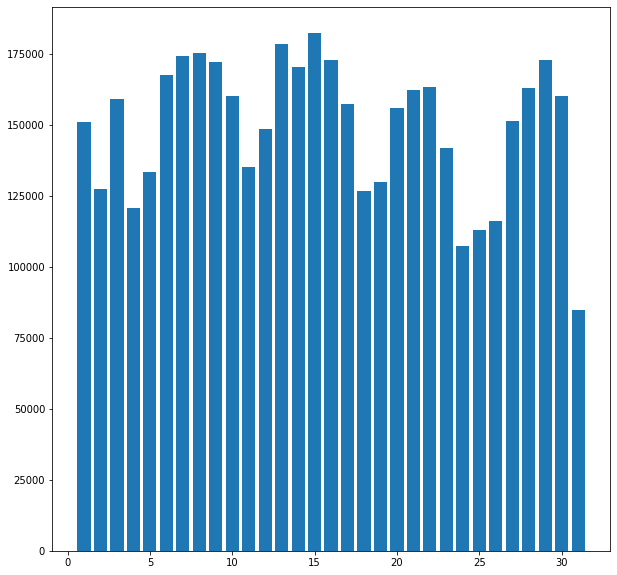

In [28]:

# plotting volume against days in december
fig, axes = plt.subplots(figsize=(10, 10))
plt.bar(range(1, 32), december.values)

### Ryan Plots

In [33]:
users = pd.read_csv('../data/out/users.csv')
users_cmts = pd.read_csv('../data/out/users_comments.csv')
cmts = pd.read_csv('../data/out/comments.csv')
cmts_cmts = pd.read_csv('../data/out/comments_comments.csv')

In [45]:
users_cmts

,_silentheartsong,c17frnf
0,product19,c17frng
1,RegularFreddieWilson,c17frnh
2,superdarkness,c17frnk
3,dockmarlin,c17frnl
4,snotrokit,c17frnm
...,...,...
4701414,Priapulid,c1b06fj
4701415,ButterflyEffect,c1b06fk
4701416,Mishkan,c1b06fm
4701417,wildbangappears,c1b06fn


In [35]:

users_reddits = users_cmts.merge(cmts.rename({'c17frng':'c17frnf'}, axis=1), on='c17frnf', how='left')
users_reddits.head()

,_silentheartsong,c17frnf,Music,1291161600,-5
0,product19,c17frng,IAmA,1291161601,8
1,RegularFreddieWilson,c17frnh,pics,1291161601,7
2,superdarkness,c17frnk,funny,1291161605,2
3,dockmarlin,c17frnl,cats,1291161606,1
4,snotrokit,c17frnm,pics,1291161606,19


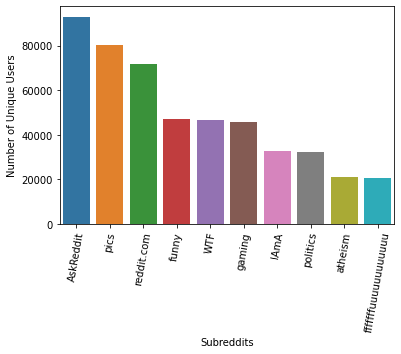

In [47]:
df = users_reddits.groupby(by='Music').nunique().rename({'_silentheartsong':'count'}, axis=1)[['count']].reset_index().rename({'Music':'subreddit'})
top_10_subs = df.sort_values('count', ascending=False).head(10)


sns.barplot(data=top_10_subs, x="Music", y="count")
plt.xticks(rotation=80)
# plt.title('Top 10 Subreddits with Unique Users')
plt.xlabel('Subreddits')
plt.ylabel('Number of Unique Users')
plt.show()

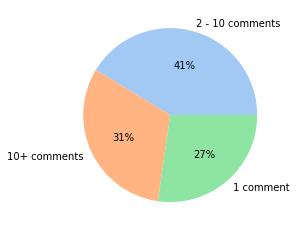

In [49]:
users_cmt_cnt = users_cmts.groupby('_silentheartsong').nunique().reset_index().rename({'_silentheartsong':'usernames', 'c17frnf':'num_cmts'}, axis=1).sort_values('num_cmts', ascending=False)

def bin(x):
    if x == 1:
        return '1 comment'
    elif 1 < x < 11:
        return '2 - 10 comments'
    elif 11 <= x:
        return '10+ comments'

users_cmt_cnt['range'] = users_cmt_cnt['num_cmts'].apply(bin)
simp = users_cmt_cnt['range'].value_counts(normalize=True).to_frame().reset_index()

data = simp['range']
labels = simp['index']

colors = sns.color_palette('pastel')[0:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
# plt.title('Distribution of comments made by Users')
plt.show()